In [48]:
import pandas as pd
import re
import requests
import math
import spacy
import spacy.cli
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from google.colab import drive

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from google.colab import files


uploaded = files.upload()

Saving tw_source.csv to tw_source.csv


In [4]:
import pandas as pd
import io

codificacion = 'latin-1'
df = pd.read_csv(io.BytesIO(uploaded['tw_source.csv']), encoding=codificacion)
print(df)

         0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  \
0        0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
1        0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
2        0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
3        0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4        0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
...     ..         ...                           ...       ...   
1599994  4  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599995  4  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599996  4  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599997  4  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY   
1599998  4  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   

         _TheSpecialOne_  \
0          scotthamilton   
1               mattycus   
2                ElleCTF   
3                 Karoli   
4               joy_wolf   
...                  ...   
1599994  Am

In [5]:
nombres_columnas = ['Numero', 'Codigo', 'Fecha', 'Query', 'Usuario','Tweet']
df.columns = nombres_columnas
df

,Numero,Codigo,Fecha,Query,Usuario,Tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [6]:
df['UsuariosPop'] = df['Tweet'].str.extractall(r'(@\w+)')[0].groupby(level=0).apply(list)

# Duplicar las filas cuando haya más de una palabra con "@"
df = df.explode('UsuariosPop', ignore_index=True)

In [48]:
df

,Numero,Codigo,Fecha,Query,Usuario,Tweet,UsuariosPop
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,NaN
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,@Kenichan
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,NaN
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",@nationwideclass
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,@Kwesidei
...,...,...,...,...,...,...,...
1648110,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,NaN
1648111,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,NaN
1648112,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...,@theNSPCC
1648113,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...,@SparksCharity


In [7]:
df = df.dropna(subset=['UsuariosPop'])
df.reset_index(drop=True, inplace=True)

In [50]:
df

,Numero,Codigo,Fecha,Query,Usuario,Tweet,UsuariosPop
0,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,@Kenichan
1,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",@nationwideclass
2,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew,@Kwesidei
3,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...,@LOLTrish
4,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it,@Tatiana_K
...,...,...,...,...,...,...,...
786603,4,2193579477,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,ChloeAmisha,@SCOOBY_GRITBOYS,@SCOOBY_GRITBOYS
786604,4,2193579489,Tue Jun 16 08:39:00 PDT 2009,NO_QUERY,EvolveTom,"@Cliff_Forster Yeah, that does work better tha...",@Cliff_Forster
786605,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...,@theNSPCC
786606,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...,@SparksCharity


In [8]:
df_agrupado = df.groupby('UsuariosPop').size().reset_index(name='Cantidad')
df_agrupado = df_agrupado.sort_values(by='Cantidad', ascending=False)
df_top5 = df_agrupado.head(5)
df_top5

,UsuariosPop,Cantidad
266369,@mileycyrus,4500
337120,@tommcfly,3887
175740,@ddlovato,3467
28515,@DavidArchie,1299
55446,@Jonasbrothers,1287


In [9]:
usuarios_filtrados = ['@mileycyrus', '@tommcfly', '@ddlovato']
df_filtrado = df[df['UsuariosPop'].isin(usuarios_filtrados)]
df_filtrado

,Numero,Codigo,Fecha,Query,Usuario,Tweet,UsuariosPop
191,0,1467929230,Mon Apr 06 22:51:34 PDT 2009,NO_QUERY,toritor11,@ddlovato @David_Henrie ummmmm i cant find it.,@ddlovato
238,0,1467953367,Mon Apr 06 22:58:30 PDT 2009,NO_QUERY,lovatolover,@ddlovato Do you hate us?? Please don't,@ddlovato
427,0,1468063101,Mon Apr 06 23:30:57 PDT 2009,NO_QUERY,kristenn_lynn,@mileycyrus hahaha dont be like that one time ...,@mileycyrus
671,0,1468210813,Tue Apr 07 00:19:09 PDT 2009,NO_QUERY,mcsteph94,@tommcfly hey saw u guys play @ pushover..didn...,@tommcfly
704,0,1468233211,Tue Apr 07 00:26:52 PDT 2009,NO_QUERY,mcflyholland,@tommcfly Good morning Tom! Why can't I send y...,@tommcfly
...,...,...,...,...,...,...,...
785331,4,2193052811,Tue Jun 16 07:55:55 PDT 2009,NO_QUERY,LizzMartin,@mileycyrus i see the photos of your KISS iss ...,@mileycyrus
785597,4,2193155701,Tue Jun 16 08:04:20 PDT 2009,NO_QUERY,lucyannedixon,@mileycyrus i am definitley definitley getting...,@mileycyrus
785643,4,2193180128,Tue Jun 16 08:06:18 PDT 2009,NO_QUERY,SarahDunphy,That fake Tom Fletcher is so crap!! Its @tom_f...,@tommcfly
786137,4,2193400885,Tue Jun 16 08:24:29 PDT 2009,NO_QUERY,pauwlo7,@mileycyrus well hello miley hows life as a...,@mileycyrus


In [10]:
df_nuevo = df_filtrado[['UsuariosPop', 'Fecha', 'Tweet']]
df_nuevo['Tweet'] = df_nuevo['Tweet'].str.replace(r'@\w+', '')
df_nuevo['Tweet'] = df_nuevo['Tweet'].str.strip()
df_nuevo['Longitud'] = [len(texto) for texto in df_nuevo['Tweet']]
df_nuevo

<ipython-input-10-6bff479d656a>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_nuevo['Tweet'] = df_nuevo['Tweet'].str.replace(r'@\w+', '')
<ipython-input-10-6bff479d656a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['Tweet'] = df_nuevo['Tweet'].str.replace(r'@\w+', '')
<ipython-input-10-6bff479d656a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nuevo['Tweet'] = df_nuevo['Tweet'].str.strip()
<ipython-input-10-6bff479d656a>:4: SettingW

,UsuariosPop,Fecha,Tweet,Longitud
191,@ddlovato,Mon Apr 06 22:51:34 PDT 2009,ummmmm i cant find it.,22
238,@ddlovato,Mon Apr 06 22:58:30 PDT 2009,Do you hate us?? Please don't,29
427,@mileycyrus,Mon Apr 06 23:30:57 PDT 2009,hahaha dont be like that one time in NY when y...,95
671,@tommcfly,Tue Apr 07 00:19:09 PDT 2009,hey saw u guys play @ pushover..didn't get 2 m...,128
704,@tommcfly,Tue Apr 07 00:26:52 PDT 2009,Good morning Tom! Why can't I send you a messa...,121
...,...,...,...,...
785331,@mileycyrus,Tue Jun 16 07:55:55 PDT 2009,i see the photos of your KISS iss beauutifull ...,61
785597,@mileycyrus,Tue Jun 16 08:04:20 PDT 2009,i am definitley definitley getting tickets for...,127
785643,@tommcfly,Tue Jun 16 08:06:18 PDT 2009,That fake Tom Fletcher is so crap!! Its thats...,116
786137,@mileycyrus,Tue Jun 16 08:24:29 PDT 2009,well hello miley hows life as a big star don...,101


In [12]:
usuarios_filtrados = ['@mileycyrus']
df_myleycyrus = df_nuevo[df_nuevo['UsuariosPop'].isin(usuarios_filtrados)]
df_myleycyrus

,UsuariosPop,Fecha,Tweet,Longitud
427,@mileycyrus,Mon Apr 06 23:30:57 PDT 2009,hahaha dont be like that one time in NY when y...,95
786,@mileycyrus,Tue Apr 07 00:45:20 PDT 2009,"i have the same problem, but it's 4:43 here......",124
805,@mileycyrus,Tue Apr 07 00:49:07 PDT 2009,I guess counting sheep didn't work Hope you g...,60
807,@mileycyrus,Tue Apr 07 00:49:44 PDT 2009,I would too if it meant spending a day in heav...,87
827,@mileycyrus,Tue Apr 07 00:56:41 PDT 2009,AWWW u seriously have the cutest dog Miley! So...,100
...,...,...,...,...
783788,@mileycyrus,Tue Jun 16 06:52:58 PDT 2009,Hey I voted for you at the teen choise awards...,92
784674,@mileycyrus,Tue Jun 16 07:31:21 PDT 2009,http://twitpic.com/7f5fy - I love you Miley! ...,99
785331,@mileycyrus,Tue Jun 16 07:55:55 PDT 2009,i see the photos of your KISS iss beauutifull ...,61
785597,@mileycyrus,Tue Jun 16 08:04:20 PDT 2009,i am definitley definitley getting tickets for...,127


In [13]:
usuarios_filtrados = ['@ddlovato']
df_ddlovato = df_nuevo[df_nuevo['UsuariosPop'].isin(usuarios_filtrados)]
df_ddlovato

,UsuariosPop,Fecha,Tweet,Longitud
191,@ddlovato,Mon Apr 06 22:51:34 PDT 2009,ummmmm i cant find it.,22
238,@ddlovato,Mon Apr 06 22:58:30 PDT 2009,Do you hate us?? Please don't,29
2496,@ddlovato,Tue Apr 07 07:02:58 PDT 2009,Wish that i could see it.. Thats the downside...,85
2517,@ddlovato,Tue Apr 07 07:05:11 PDT 2009,"hey demi, wen are you and selena gonna do anot...",68
3042,@ddlovato,Fri Apr 17 20:31:31 PDT 2009,ahhhh i wish i could go to the dallas show...b...,74
...,...,...,...,...
782370,@ddlovato,Tue Jun 16 06:00:23 PDT 2009,hope to see you soon,20
782546,@ddlovato,Tue Jun 16 06:06:42 PDT 2009,Fell asleep to and woke up to . this is going...,63
782657,@ddlovato,Tue Jun 16 06:12:27 PDT 2009,I VOTED!! =]]] can't wait,25
785265,@ddlovato,Tue Jun 16 07:52:11 PDT 2009,FINALLY 15 TOMORROW And Voted for you all...,58


In [14]:
usuarios_filtrados = ['@tommcfly']
df_tommcfly = df_nuevo[df_nuevo['UsuariosPop'].isin(usuarios_filtrados)]
df_tommcfly

,UsuariosPop,Fecha,Tweet,Longitud
671,@tommcfly,Tue Apr 07 00:19:09 PDT 2009,hey saw u guys play @ pushover..didn't get 2 m...,128
704,@tommcfly,Tue Apr 07 00:26:52 PDT 2009,Good morning Tom! Why can't I send you a messa...,121
937,@tommcfly,Tue Apr 07 01:23:07 PDT 2009,did you know that johnsons baby use animals li...,85
1122,@tommcfly,Tue Apr 07 02:03:41 PDT 2009,"good morning guys, how are you all? You know, ...",83
1298,@tommcfly,Tue Apr 07 02:46:02 PDT 2009,"hey, no chance of adding brighton or eastbourn...",121
...,...,...,...,...
783568,@tommcfly,Tue Jun 16 06:46:41 PDT 2009,you should record Star Girl with JB,35
783681,@tommcfly,Tue Jun 16 06:50:40 PDT 2009,why you at the studio then? just watched a vi...,115
783726,@tommcfly,Tue Jun 16 06:50:59 PDT 2009,Gonna make a trip to England in the holidays. ...,60
784834,@tommcfly,Tue Jun 16 07:37:16 PDT 2009,Heya Tom! You should follow Peter Facinelli fr...,92


In [15]:
corpustom = df_tommcfly['Tweet']
corpustom

corpuslovato = df_ddlovato['Tweet']
corpuslovato

corpusmyley = df_myleycyrus['Tweet']
corpusmyley

427       hahaha dont be like that one time in NY when y...
786       i have the same problem, but it's 4:43 here......
805       I guess counting sheep didn't work  Hope you g...
807       I would too if it meant spending a day in heav...
827       AWWW u seriously have the cutest dog Miley! So...
                                ...                        
783788    Hey  I voted for you at the teen choise awards...
784674    http://twitpic.com/7f5fy - I love you Miley!  ...
785331    i see the photos of your KISS iss beauutifull ...
785597    i am definitley definitley getting tickets for...
786137    well  hello miley  hows life as a big star don...
Name: Tweet, Length: 4500, dtype: object

### Normalización

In [16]:
def normalizacion(corpus):
       newCorpus = []
       for doc in corpus:
              newCorpus.append(re.sub(r'[^a-zA-Z0-9\s{1}áéíóúüñÁÉÍÓÚ]', '', doc).lower().strip().rstrip('\n').rstrip('\r\n'))
       return newCorpus

In [93]:
corpus_normalization_mcfly = normalizacion(corpustom)

corpus_normalization_lovato = normalizacion(corpuslovato)

corpus_normalization_myley = normalizacion(corpusmyley)

### Tokenización

In [20]:
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [23]:
nlp = spacy.load("en_core_web_sm")

In [94]:
def tokenizacion(corpus):
       newCorpus = []
       for doc in corpus:
              newCorpus.append(nlp(doc))
       return newCorpus

In [95]:
corpus_tokenization_myley = tokenizacion(corpus_normalization_myley)
corpus_tokenization_lovato = tokenizacion(corpus_normalization_lovato)
corpus_tokenization_mcfly = tokenizacion(corpus_normalization_mcfly)

### Stopwords

In [96]:
def removeStops(corpus):
       newCorpus = []
       for doc in corpus:
              s = ''
              for token in doc:
                     if(token.is_stop == False):
                            s = s + token.text + ' '
              newCorpus.append(s.strip())
       return newCorpus

In [97]:
corpus_no_stops_myley = removeStops(corpus_tokenization_myley)
corpus_no_stops_lovato = removeStops(corpus_tokenization_lovato)
corpus_no_stops_mcfly = removeStops(corpus_tokenization_mcfly)

### Stemming y Lemmatization


In [98]:
def stemmingLemmating(corpus):
       documents = tokenizacion(corpus)
       newDocs = []
       for doc in documents:
              s = ''
              for token in doc:
                     s = s + token.lemma_ + ' '
              newDocs.append(s.strip())
       return newDocs

In [99]:
corpus_stemm_lemm_myley = stemmingLemmating(corpus_no_stops_myley)
corpus_stemm_lemm_lovato = stemmingLemmating(corpus_no_stops_lovato)
corpus_stemm_lemm_mcfly = stemmingLemmating(corpus_no_stops_mcfly)

In [100]:
stop_words = set(stopwords.words('english'))
all_words_myley = []
for sentence in corpus_stemm_lemm_myley:
    words = word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words and word != 'miley']
    all_words_myley.extend(words)


In [105]:
stop_words = set(stopwords.words('english'))
all_words_lovato = []
for sentence in corpus_stemm_lemm_lovato:
    words = word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words and word != 'demi' and word != 'ur' and word != 'u' and word != 'nt' and word != 'amp' and word != 'love']
    all_words_lovato.extend(words)

In [106]:
stop_words = set(stopwords.words('english'))
all_words_mcfly = []
for sentence in corpus_stemm_lemm_mcfly:
    words = word_tokenize(sentence.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words and word != 'tom' and word != 'x' and word != 'u' and word != 'xx' and word != 'haha' and word != 'love']
    all_words_mcfly.extend(words)

In [107]:
word_freq_myley = Counter(all_words_myley)
top_10_words_myley = word_freq_myley.most_common(20)

word_freq_lovato = Counter(all_words_lovato)
top_10_words_lovato = word_freq_lovato.most_common(20)

word_freq_mcfly = Counter(all_words_mcfly)
top_10_words_mcfly = word_freq_mcfly.most_common(20)

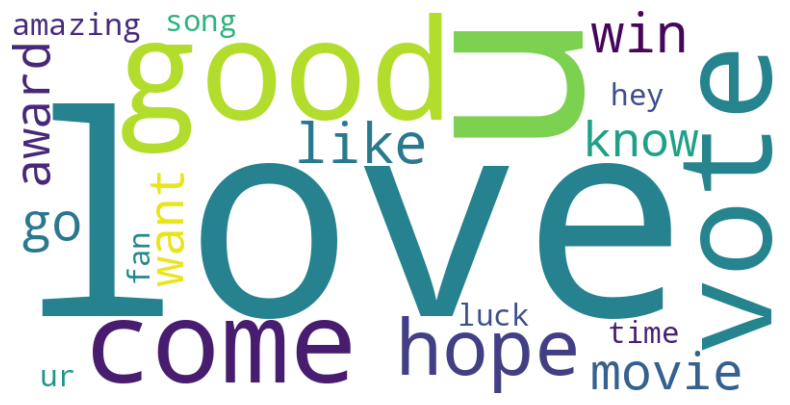

In [108]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_10_words_myley))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

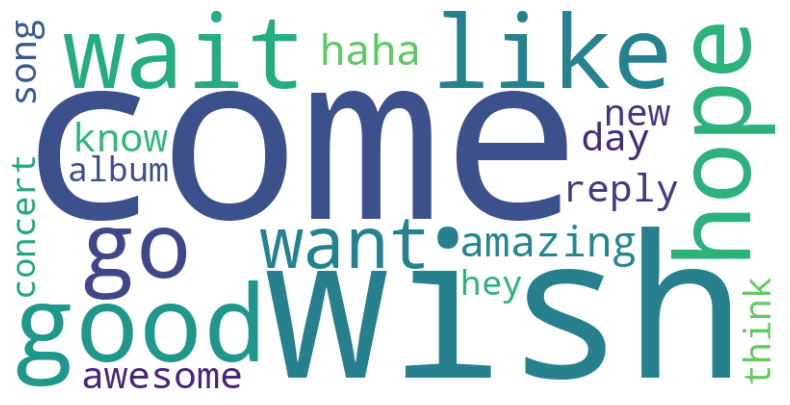

In [109]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_10_words_lovato))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

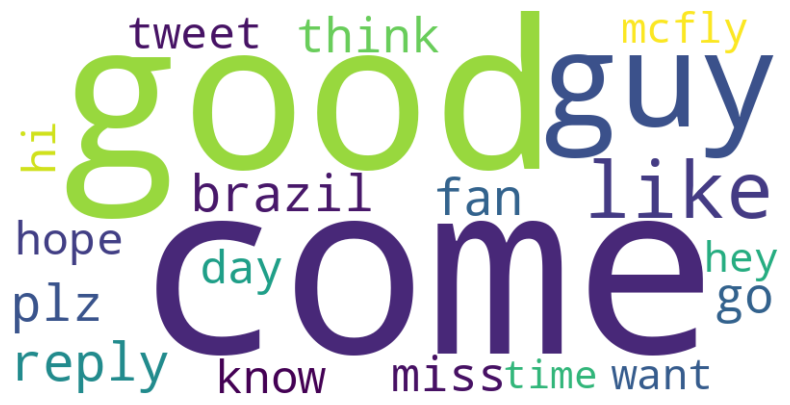

In [110]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_10_words_mcfly))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()